<a href="https://colab.research.google.com/github/TanyaJames/bouncing/blob/master/Copy_of_SpectraAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input, Reshape
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
import matplotlib.pyplot as plt
from keras import backend as K
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import Image
from skimage import transform
from keras.models import Model
import pandas as pd
from pprint import pprint
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
input_img = keras.Input(shape=(256, 256, 3))

In [ ]:
# Define the model
model = Sequential()

# 1st convolution layer
model.add(Conv2D(512, (3, 3), padding='same', input_shape = (256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))


# test convolution layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# test convolution layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))


# test convolution layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))


# Added one dimensional dense layer
model.add(Flatten())
model.add(Dense(512))
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(128))
model.add(Dense(100, name='encoded'))
model.add(Dense(128))
model.add(Dense(128))
model.add(Dense(256))
model.add(Dense(512))
# NOTE: Unflatten?
output_dims = (16, 16, 128)
model.add(Dense(np.product(output_dims)))
model.add(Reshape(output_dims))

# test convolution layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))

# test convolution layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))


# test convolution layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))

# 4th convolution layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))


# -------------------------

model.add(Conv2D(3, (3, 3), padding='same'))
model.add(Activation('relu')) # sigmoid

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 512)     14336     
_________________________________________________________________
activation (Activation)      (None, 256, 256, 512)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 512)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 512)     2359808   
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 512)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 512)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       1

In [ ]:
# Compile the model
model.compile(optimizer='adadelta', loss='binary_crossentropy') #categorical_crossentropy

In [ ]:
# Generate data from the images in a folder
batch_size = 8
train_datagen = ImageDataGenerator(rescale=1. / 255, data_format='channels_last')
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI Project Materials/Spectra',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='input'
)
test_datagen = ImageDataGenerator(rescale=1. / 255, data_format='channels_last')
validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI Project Materials/Spectra',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='input'
)


Found 1440 images belonging to 8 classes.
Found 1440 images belonging to 8 classes.


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=1000 // batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=1000 // batch_size)

Epoch 1/100
125/125 [==============================] - 417s 3s/step - loss: 1.3778 - val_loss: 0.7523
Epoch 2/100
125/125 [==============================] - 125s 1s/step - loss: 0.6586 - val_loss: 0.4964
Epoch 3/100
125/125 [==============================] - 128s 1s/step - loss: 0.4777 - val_loss: 0.4505
Epoch 4/100
125/125 [==============================] - 129s 1s/step - loss: 0.4464 - val_loss: 0.4354
Epoch 5/100
125/125 [==============================] - 128s 1s/step - loss: 0.4314 - val_loss: 0.4216
Epoch 6/100
125/125 [==============================] - 128s 1s/step - loss: 0.4181 - val_loss: 0.4080
Epoch 7/100
125/125 [==============================] - 129s 1s/step - loss: 0.4063 - val_loss: 0.3988
Epoch 8/100
125/125 [==============================] - 128s 1s/step - loss: 0.3967 - val_loss: 0.3904
Epoch 9/100
125/125 [==============================] - 128s 1s/step - loss: 0.3917 - val_loss: 0.3862
Epoch 10/100
125/125 [==============================] - 129s 1s/step - loss: 0.387

In [ ]:
result = model.evaluate(validation_generator)

180/180 [==============================] - 50s 279ms/step - loss: 0.3719


In [ ]:
# Test the model
data_list = []
batch_index = 0
while batch_index <= train_generator.batch_index:
    data = train_generator.next()
    data_list.append(data[0])
    batch_index = batch_index + 1
data_list[0].shape


(8, 256, 256, 3)

Text(0, 0.5, 'loss')

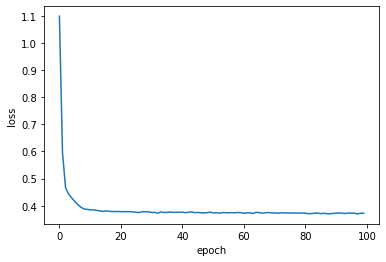

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

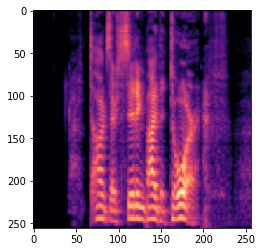

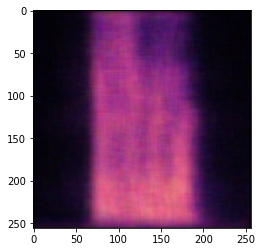

In [ ]:
predicted = model(data_list[0])
plt.imshow(data_list[0][4])
plt.show()
plt.imshow(predicted[4])
plt.show()

In [ ]:
hidden = model.get_layer(name='encoded').output
encoder = Model(inputs=model.input, outputs=hidden)
Reduced_layer = encoder.predict(np.array([data_list[0][0]]))
Reduced_layer

array([[-0.3448916 ,  1.892765  ,  0.17099641,  0.1536789 ,  0.2601259 ,
        -0.08509865, -0.96042264,  1.1000254 , -1.7824281 , -1.3717835 ,
        -0.62203324, -0.43803766, -0.6891297 , -0.26331216, -0.7799803 ,
         0.9212459 ,  1.0414844 , -1.9384935 , -0.20952639,  1.0448309 ,
         0.59008336, -0.18580271,  0.93772787, -0.12971182, -1.8041841 ,
        -1.1155039 , -0.6933325 ,  0.22331719, -0.9743535 ,  0.09418632,
         1.0645808 , -0.88842475, -0.68599224, -0.8254361 , -0.26320526,
         0.15794459,  0.533769  ,  0.00377426,  2.8525217 ,  0.04803562,
         0.8604039 ,  0.14835134,  0.851585  ,  0.51379704,  0.80033386,
        -0.97580945, -0.06731972,  0.22464319, -0.13480355, -0.63184744,
         1.7463392 , -0.6173079 ,  0.05050879,  0.74061304, -1.0133148 ,
         0.42930508,  0.06080738, -0.10236859, -0.1850195 , -0.06439393,
        -0.04141624,  0.04811125, -2.190238  ,  0.65310746,  0.01365196,
         0.35802567,  0.7928885 , -0.14517282, -1.2

In [ ]:

def load(filename):
  np_image = Image.open(filename)
  np_image = np.array(np_image).astype('float32')/255
  np_image = transform.resize(np_image, (256, 256, 3))
  np_image = np.expand_dims(np_image, axis=0)
  return np_image

image = load('/content/drive/MyDrive/AI Project Materials/Spectra/1/03-01-01-01-01-01-01.png')
encoder.predict(image).flatten()

array([-4.76972699e-01,  2.47202826e+00,  1.74756721e-01,  2.41032436e-01,
        3.27722162e-01, -7.36444145e-02, -1.21212459e+00,  1.51410735e+00,
       -2.37729812e+00, -1.71774435e+00, -9.04735923e-01, -6.57137811e-01,
       -9.37748969e-01, -4.02199000e-01, -1.00046766e+00,  1.29963064e+00,
        1.44565094e+00, -2.49710178e+00, -2.26721823e-01,  1.42451954e+00,
        7.28980243e-01, -1.48680270e-01,  1.18371940e+00, -2.67831087e-01,
       -2.25067282e+00, -1.52103424e+00, -9.32658732e-01,  2.22268343e-01,
       -1.23407650e+00,  1.59840778e-01,  1.37216020e+00, -1.07109892e+00,
       -8.33430946e-01, -1.21885765e+00, -3.33311021e-01,  1.01232357e-01,
        7.58057117e-01, -7.55814984e-02,  3.70627761e+00, -1.45751270e-04,
        1.15647542e+00,  2.58159369e-01,  1.04923356e+00,  6.70595646e-01,
        1.03011751e+00, -1.22417450e+00, -1.03029899e-01,  3.23624283e-01,
       -1.44567564e-01, -9.13759053e-01,  2.21384573e+00, -8.66955280e-01,
        8.37569088e-02,  

In [ ]:
df_ANOVA = pd.read_csv(f"/content/drive/MyDrive/AI Project Materials/SurfboardFeatures_SortedBy_ANOVA.csv")
df_ExtraTrees = pd.read_csv(f"/content/drive/MyDrive/AI Project Materials/SurfboardFeatures_SortedBy_ExtraTrees.csv")

In [ ]:
df_ANOVA.head()

,Filename,loudness,log_energy,mfcc_mean_1,spectral_slope_std,spectral_slope_first_derivative_std,spectral_slope_mean,spectral_slope_second_derivative_std,bark_spectrogram_std_14,spectral_flux_std,rms_std,rms_first_derivative_std,spectral_flux_mean,bark_spectrogram_first_derivative_std_14,bark_spectrogram_first_derivative_std_16,bark_spectrogram_second_derivative_std_16,log_energy_slidingwindow_std,rms_mean,bark_spectrogram_first_derivative_std_19,bark_spectrogram_second_derivative_std_14,bark_spectrogram_second_derivative_std_19,spectral_flux_q3_q1_range,bark_spectrogram_std_16,bark_spectrogram_std_15,bark_spectrogram_first_derivative_std_15,bark_spectrogram_second_derivative_std_21,bark_spectrogram_first_derivative_std_22,bark_spectrogram_second_derivative_std_20,bark_spectrogram_second_derivative_std_15,bark_spectrogram_second_derivative_std_22,spectral_flux_first_derivative_std,rms_second_derivative_std,bark_spectrogram_first_derivative_std_21,bark_spectrogram_mean_14,spectral_slope_q3_q1_range,bark_spectrogram_first_derivative_std_20,bark_spectrogram_mean_16,magnitude_spectrum_second_derivative_std_121,magnitude_spectrum_mean_150,magnitude_spectrum_std_150,...,chroma_cqt_second_derivative_mean_8,magnitude_spectrum_first_derivative_skewness_970,magnitude_spectrum_second_derivative_skewness_903,magnitude_spectrum_second_derivative_mean_247,magnitude_spectrum_first_derivative_mean_54,bark_spectrogram_second_derivative_mean_2,bark_spectrogram_second_derivative_mean_11,magnitude_spectrum_first_derivative_skewness_695,magnitude_spectrum_second_derivative_mean_294,magnitude_spectrum_second_derivative_mean_98,bark_spectrogram_second_derivative_mean_16,magnitude_spectrum_second_derivative_mean_877,magnitude_spectrum_first_derivative_skewness_345,magnitude_spectrum_second_derivative_mean_297,magnitude_spectrum_first_derivative_skewness_902,magnitude_spectrum_first_derivative_skewness_938,magnitude_spectrum_second_derivative_mean_132,magnitude_spectrum_second_derivative_mean_949,bark_spectrogram_second_derivative_mean_3,magnitude_spectrum_second_derivative_mean_76,magnitude_spectrum_second_derivative_mean_118,magnitude_spectrum_first_derivative_skewness_830,magnitude_spectrum_second_derivative_mean_207,magnitude_spectrum_second_derivative_mean_839,magnitude_spectrum_first_derivative_skewness_802,spectral_slope_second_derivative_mean,magnitude_spectrum_second_derivative_mean_143,magnitude_spectrum_second_derivative_mean_542,log_melspec_second_derivative_mean_118,magnitude_spectrum_first_derivative_skewness_579,magnitude_spectrum_second_derivative_mean_840,magnitude_spectrum_second_derivative_mean_152,magnitude_spectrum_second_derivative_mean_177,log_melspec_second_derivative_mean_117,magnitude_spectrum_second_derivative_mean_176,magnitude_spectrum_first_derivative_skewness_816,magnitude_spectrum_second_derivative_mean_91,magnitude_spectrum_second_derivative_mean_109,magnitude_spectrum_second_derivative_mean_12,Emotion
0,03-01-06-02-01-02-17.wav,-21.460366,-24.756781,-458.567657,0.001328,0.000338,-0.000755,0.000283,14.379627,0.023590,0.049225,0.010694,0.014235,5.491582,7.572964,7.323168,23.487746,0.030334,7.552783,5.264425,8.481045,0.016118,18.389128,16.420425,5.916763,5.689517,6.743412,6.806491,5.547394,6.705968,0.010572,0.006919,5.690310,7.277250,0.000726,6.113908,8.748704,0.794764,0.337164,0.893599,...,-0.000152,0.341670,-0.792593,-3.200000e-07,-1.310000e-06,2.140000e-05,-1.100000e-05,-0.175342,1.630000e-07,-1.410000e-06,9.550000e-06,1.810000e-06,-0.170421,1.060000e-06,-0.570997,0.220803,1.630000e-07,-4.840000e-07,-2.560000e-05,1.450000e-06,-2.110000e-07,-0.247185,1.670000e-07,1.690000e-07,-0.349336,-7.840000e-11,3.370000e-07,-6.690000e-07,0.0,1.544194,-8.180000e-08,1.100000e-06,-1.030000e-06,0.0,5.930000e-07,1.401665,2.300000e-07,-2.360000e-06,4.590000e-06,6
1,03-01-06-02-02-01-06.wav,-20.956774,-24.268186,-421.576874,0.001228,0.000377,-0.000874,0.000335,19.537716,0.022870,0.048777,0.012317,0.016555,8.108475,7.973923,8.780952,21.90

In [ ]:
df_ExtraTrees.head()

,log_energy,loudness,spectral_slope_first_derivative_std,magnitude_spectrum_mean_198,spectral_flux_std,spectral_slope_second_derivative_std,mfcc_mean_1,bark_spectrogram_second_derivative_std_3,spectral_flux_q3_q1_range,rms_std,spectral_slope_std,spectral_flux_second_derivative_std,bark_spectrogram_second_derivative_std_16,bark_spectrogram_std_16,spectral_flux_mean,spectral_slope_mean,magnitude_spectrum_mean_195,magnitude_spectrum_mean_171,shannon_entropy_slidingwindow_second_derivative_std,magnitude_spectrum_mean_94,magnitude_spectrum_second_derivative_std_27,spectral_flux_first_derivative_std,bark_spectrogram_first_derivative_std_16,magnitude_spectrum_std_173,magnitude_spectrum_second_derivative_std_38,bark_spectrogram_mean_17,bark_spectrogram_std_15,bark_spectrogram_first_derivative_std_14,magnitude_spectrum_second_derivative_std_96,bark_spectrogram_first_derivative_std_8,magnitude_spectrum_q3_q1_range_180,magnitude_spectrum_q3_q1_range_171,bark_spectrogram_mean_12,magnitude_spectrum_mean_210,bark_spectrogram_first_derivative_std_15,bark_spectrogram_first_derivative_std_12,magnitude_spectrum_first_derivative_std_28,magnitude_spectrum_first_derivative_std_962,bark_spectrogram_second_derivative_std_15,bark_spectrogram_first_derivative_std_7,...,log_melspec_second_derivative_mean_99,log_melspec_first_derivative_mean_121,log_melspec_first_derivative_mean_111,log_melspec_first_derivative_mean_102,log_melspec_second_derivative_mean_93,log_melspec_first_derivative_mean_98,log_melspec_first_derivative_mean_120,log_melspec_second_derivative_mean_102,log_melspec_second_derivative_mean_97,log_melspec_second_derivative_mean_118,log_melspec_first_derivative_mean_97,f0_contour_second_derivative_mean,log_melspec_first_derivative_mean_126,log_melspec_first_derivative_mean_124,log_melspec_second_derivative_mean_110,log_melspec_second_derivative_mean_125,log_melspec_second_derivative_mean_114,log_melspec_second_derivative_mean_123,log_melspec_first_derivative_mean_127,log_melspec_second_derivative_mean_126,log_melspec_second_derivative_mean_122,log_melspec_first_derivative_mean_122,log_melspec_first_derivative_mean_119,log_melspec_first_derivative_mean_118,log_melspec_second_derivative_mean_121,log_melspec_second_derivative_mean_112,log_melspec_second_derivative_mean_119,log_melspec_second_derivative_mean_120,log_melspec_second_derivative_mean_116,log_melspec_first_derivative_mean_117,log_melspec_first_derivative_mean_125,log_melspec_second_derivative_mean_117,log_melspec_second_derivative_mean_127,log_melspec_second_derivative_mean_124,intensity_first_derivative_mean,log_melspec_first_derivative_mean_128,spectral_slope_second_derivative_mean,log_melspec_second_derivative_mean_128,Filename,Emotion
0,-24.756781,-21.460366,0.000338,0.093562,0.023590,0.000283,-458.567657,10.725215,0.016118,0.049225,0.001328,0.016399,7.323168,18.389128,0.014235,-0.000755,0.106928,0.366817,7.059463,0.301035,3.858958,0.010572,7.572964,0.526465,2.780090,4.980598,16.420425,5.491582,0.580553,14.311836,0.151330,0.213528,6.294894,0.074976,5.916763,6.934805,3.332766,0.008293,5.547394,8.662087,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,6.240000e-11,0.0,-7.840000e-11,0.0,03-01-06-02-01-02-17.wav,6
1,-24.268186,-20.956774,0.000377,0.170999,0.022870,0.000335,-421.576874,0.409182,0.030127,0.048777,0.001228,0.015687,8.780952,19.067059,0.016555,-0.000874,0.249214,0.362220,8.528969,1.324658,3.861584,0.011086,7.973923,1.463401,1.642202,10.747603,23.651663,8.108475,4.039955,7.292735,0.276611,0.251520,19.512791,0.146458,10.060501,16.209951,4.497900,0.011678,10.392575,7.406614,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.190000e-08,0.0,0.0,0.0,0.0,1.640000e-11,0.0,-8.320000e-09,0.0,03-01-06-02-02-01-06.wav,6
2,-29.367133,-26.565208,

In [ ]:
anova_et_features = list(set(df_ANOVA.iloc[:,1:101+1].columns).union(set(df_ExtraTrees.iloc[:,1:101+1].columns)))
#anova_et_features

In [ ]:
df_fullRAVDESS = pd.read_csv('/content/drive/MyDrive/AI Project Materials/output.csv',sep='\s*,\s*')
df_fullRAVDESS.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,mfcc_std_1,mfcc_std_2,mfcc_std_3,mfcc_std_4,mfcc_std_5,mfcc_std_6,mfcc_std_7,mfcc_std_8,mfcc_std_9,mfcc_std_10,mfcc_std_11,mfcc_std_12,mfcc_std_13,mfcc_first_derivative_mean_1,mfcc_first_derivative_mean_2,mfcc_first_derivative_mean_3,mfcc_first_derivative_mean_4,mfcc_first_derivative_mean_5,mfcc_first_derivative_mean_6,mfcc_first_derivative_mean_7,mfcc_first_derivative_mean_8,mfcc_first_derivative_mean_9,mfcc_first_derivative_mean_10,mfcc_first_derivative_mean_11,mfcc_first_derivative_mean_12,mfcc_first_derivative_mean_13,...,loudness_slidingwindow_second_derivative_mean,loudness_slidingwindow_second_derivative_std,loudness_slidingwindow_second_derivative_skewness,loudness_slidingwindow_second_derivative_kurtosis,loudness_slidingwindow_q3_q1_range,crest_factor_mean,crest_factor_std,crest_factor_first_derivative_mean,crest_factor_first_derivative_std,crest_factor_first_derivative_skewness,crest_factor_first_derivative_kurtosis,crest_factor_kurtosis,crest_factor_skewness,crest_factor_second_derivative_mean,crest_factor_second_derivative_std,crest_factor_second_derivative_skewness,crest_factor_second_derivative_kurtosis,crest_factor_q3_q1_range,ppe,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,hnr,LPC_0,LPC_1,LPC_2,LPC_3,LPC_4,LSF_0,LSF_1,LSF_2,LSF_3,Filename
0,0,-458.567657,45.223022,-7.745950,7.739831,1.616493,9.825963,-2.125770,4.209764,-1.966420,0.563232,-2.173723,3.099982,1.964524,165.364517,53.559277,23.970478,13.562628,16.327545,12.529330,17.549969,8.354141,11.071825,9.652879,12.753353,8.631584,8.239992,2.314297e-03,3.273153e-03,3.274674e-03,3.277193e-03,3.280658e-03,3.285084e-03,3.290473e-03,3.296744e-03,3.303855e-03,3.311793e-03,3.320480e-03,3.329880e-03,3.339901e-03,...,-inf,NaN,NaN,NaN,32.336951,2.823062,4.322392,-0.010146,3.216099,-1.601204,68.013916,75.499008,7.238155,-0.000223,4.521580,-8.128293,132.504776,1.912804,-29.731304,0.023138,0.000138,0.006139,0.002533,0.018417,0.451287,1.530486,0.251059,0.417021,NaN,6.870259,1.0,-1.863068,1.464409,-1.033467,0.455947,0.122948,0.473165,1.358087,1.803514,03-01-06-02-01-02-17.wav
1,1,-421.576874,36.962582,-46.407417,-11.489964,-17.194260,-3.660902,-26.064619,-15.468013,-11.945992,-9.927405,-2.557202,10.971281,1.948284,135.704788,41.902206,39.216999,30.833277,27.140551,16.853188,25.861799,11.795774,14.774220,14.862297,12.320617,12.670840,14.203586,2.024694e-02,1.446338e-02,-3.086078e-03,-6.216620e-03,-1.138330e-02,-1.200035e-02,2.295818e-03,7.038901e-03,-4.160097e-03,-3.640861e-03,8.503010e-03,6.982322e-03,-4.485585e-03,...,-0.786798,11.313085,0.083267,1.563765,8.423080,4.564868,5.873569,-0.002814,5.192000,1.016663,27.639120,27.800673,4.913262,-0.001205,7.356042,-2.763733,31.916225,1.599024,-147.206718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.882008,1.0,-1.893028,1.382982,-0.813838,0.374531,0.187391,0.393415,1.290380,1.864841,03-01-06-02-02-01-06.wav
2,2,-499.181183,28.009521,-16.494606,-3.840472,-12.946301,-5.593931,-17.039743,-4.567708,-10.209822,-8.806841,-5.861173,-4.293940,-5.259099,125.805473,44.796963,26.014425,18.874836,22.327732,13.543786,23.107935,8.999081,16.314257,12.463244,11.354929,8.641957,10.461554,0.000000e+00,2.179827e-08,-2.179827e-08,2.179827e-08,-5.449567e-09,0.000000e+00,-1.089913e-08,-5.449567e-09,0.000000e+00,2.179827e-08,-1.089913e-08,-2.724784e-08,1.907349e-08,...,NaN,NaN,NaN,NaN,15.735738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.843018,1.0,-1.648529,1.113521,-0.851779,0.420633,0.139071,0.541948,1.446877,1.898769,03-01-06-02-01-02-24.wav
3,3,-521.095764,45.425533,-6.791416,7.489796,-3.352586,3.642235,-7.147908,-4.849596,-6.923756,0.631023,-6.085114,-3.229874,-1.697789,173.588425,54.022415,23.081327,18.877089,17.690973,15.976244,16.506657,13.3295

In [ ]:
df_fullRAVDESS[anova_et_features].head()

,magnitude_spectrum_first_derivative_std_122,bark_spectrogram_std_5,magnitude_spectrum_mean_131,magnitude_spectrum_mean_169,magnitude_spectrum_mean_958,bark_spectrogram_first_derivative_std_21,bark_spectrogram_std_15,magnitude_spectrum_q3_q1_range_173,bark_spectrogram_first_derivative_std_17,magnitude_spectrum_second_derivative_std_28,magnitude_spectrum_q3_q1_range_165,bark_spectrogram_first_derivative_std_5,bark_spectrogram_first_derivative_std_15,magnitude_spectrum_second_derivative_std_149,magnitude_spectrum_first_derivative_std_150,magnitude_spectrum_first_derivative_std_460,magnitude_spectrum_q3_q1_range_170,magnitude_spectrum_first_derivative_std_962,magnitude_spectrum_mean_138,spectral_slope_second_derivative_std,magnitude_spectrum_first_derivative_std_28,magnitude_spectrum_mean_165,magnitude_spectrum_std_150,magnitude_spectrum_first_derivative_std_120,spectral_flux_first_derivative_std,magnitude_spectrum_q3_q1_range_174,magnitude_spectrum_first_derivative_std_15,magnitude_spectrum_second_derivative_std_151,magnitude_spectrum_second_derivative_std_27,bark_spectrogram_first_derivative_std_22,magnitude_spectrum_std_132,bark_spectrogram_second_derivative_std_17,spectral_slope_q3_q1_range,bark_spectrogram_second_derivative_std_3,bark_spectrogram_first_derivative_std_23,spectral_slope_std,spectral_flux_std,bark_spectrogram_first_derivative_std_20,magnitude_spectrum_first_derivative_std_119,magnitude_spectrum_second_derivative_std_96,...,magnitude_spectrum_second_derivative_std_122,magnitude_spectrum_second_derivative_std_172,magnitude_spectrum_second_derivative_std_150,magnitude_spectrum_mean_193,rms_mean,spectral_flux_second_derivative_std,magnitude_spectrum_first_derivative_std_134,bark_spectrogram_first_derivative_std_13,magnitude_spectrum_second_derivative_std_121,magnitude_spectrum_std_149,bark_spectrogram_mean_17,loudness,bark_spectrogram_second_derivative_std_13,magnitude_spectrum_mean_650,magnitude_spectrum_first_derivative_std_959,magnitude_spectrum_mean_210,magnitude_spectrum_first_derivative_std_151,magnitude_spectrum_mean_164,magnitude_spectrum_q3_q1_range_136,magnitude_spectrum_q3_q1_range_171,magnitude_spectrum_q3_q1_range_132,magnitude_spectrum_second_derivative_std_109,bark_spectrogram_mean_15,bark_spectrogram_std_17,magnitude_spectrum_mean_206,magnitude_spectrum_q3_q1_range_180,magnitude_spectrum_first_derivative_std_113,log_energy,magnitude_spectrum_second_derivative_std_165,bark_spectrogram_first_derivative_std_6,bark_spectrogram_second_derivative_std_23,magnitude_spectrum_second_derivative_std_123,magnitude_spectrum_second_derivative_std_39,magnitude_spectrum_second_derivative_std_119,bark_spectrogram_second_derivative_std_12,magnitude_spectrum_mean_162,bark_spectrogram_first_derivative_std_12,magnitude_spectrum_mean_201,magnitude_spectrum_std_168,bark_spectrogram_first_derivative_std_8
0,0.465654,32.973377,0.270688,0.294543,0.007477,5.690310,16.420425,0.199127,4.113556,3.953487,0.256666,15.536144,5.916763,0.790323,0.470638,0.132170,0.166545,0.008293,0.441034,0.000283,3.332766,0.346346,0.893599,0.806355,0.010572,0.180890,4.265217,1.073294,3.858958,6.743412,0.700180,4.589221,0.000726,10.725215,6.204947,0.001328,0.023590,6.113908,0.815249,0.580553,...,0.669428,0.532378,0.581107,0.090527,0.030334,0.016399,0.454763,4.626786,0.794764,0.642312,4.980598,-21.460366,4.875392,0.041686,0.008743,0.074976,0.718352,0.340697,0.209871,0.213528,0.240193,1.000134,7.280578,9.400084,0.086710,0.151330,0.633497,-24.756781,0.573616,11.976687,6.670580,0.532388,2.636179,1.078154,7.294032,0.324328,6.934805,0.102448,0.633902,14.311836
1,0.661216,31.592491,0.574426,0.286034,0.010640,3.770604,23.651663,0.388937,8.304849,4.861989,0.308976,15.571555,10.060501,1.588154,1.475679,0.143625,0.230081,0.011678,0.489375,0.000335,4.497900,0.313324,2.225112,1.164535,0.011086,0.369489,0.030994,1.801773,3.861584,5.810372,1.392202,8.457822,0.001536,0.409182,5.422984,0.001228,0.022870,2.942399,1.066784,4.039955,...,0.834723,1.134665,1.813910,0.38399

In [ ]:
for columnname in anova_et_features:
  if columnname not in df_fullRAVDESS.columns: print(columnname)

In [ ]:
from keras.utils import to_categorical

In [ ]:
encoded_Xs = []

for filename in tqdm(df_fullRAVDESS['Filename']):
  image = load(f'/content/drive/MyDrive/AI Project Materials/Spectra/{filename[7]}/{filename[:-4]}.png')
  encoded = encoder.predict(image).flatten()
  encoded_Xs.append(encoded)


100%|██████████| 1440/1440 [02:20<00:00, 10.28it/s]


In [ ]:
Xs = np.hstack((encoded_Xs, df_fullRAVDESS[anova_et_features].to_numpy()))
Xs.shape


(1440, 269)

In [ ]:
ys = np.array([int(filename[7])-1 for filename in df_fullRAVDESS['Filename']]) # ONE HOT ENCODING REQUIRES LABELS STARTING FROM 0
y = to_categorical(ys)
num_features = Xs.shape[1]
num_classes = len(np.unique(ys))

print(num_features)
print(np.unique(ys))
print(ys)

269
[0 1 2 3 4 5 6 7]
[5 5 5 ... 5 5 5]


In [ ]:
df_fullValidated = pd.read_csv('/content/drive/MyDrive/AI Project Materials/validation_16000_features.csv',sep='\s*,\s*')
df_fullRAVDESS[anova_et_features]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,magnitude_spectrum_first_derivative_std_122,bark_spectrogram_std_5,magnitude_spectrum_mean_131,magnitude_spectrum_mean_169,magnitude_spectrum_mean_958,bark_spectrogram_first_derivative_std_21,bark_spectrogram_std_15,magnitude_spectrum_q3_q1_range_173,bark_spectrogram_first_derivative_std_17,magnitude_spectrum_second_derivative_std_28,magnitude_spectrum_q3_q1_range_165,bark_spectrogram_first_derivative_std_5,bark_spectrogram_first_derivative_std_15,magnitude_spectrum_second_derivative_std_149,magnitude_spectrum_first_derivative_std_150,magnitude_spectrum_first_derivative_std_460,magnitude_spectrum_q3_q1_range_170,magnitude_spectrum_first_derivative_std_962,magnitude_spectrum_mean_138,spectral_slope_second_derivative_std,magnitude_spectrum_first_derivative_std_28,magnitude_spectrum_mean_165,magnitude_spectrum_std_150,magnitude_spectrum_first_derivative_std_120,spectral_flux_first_derivative_std,magnitude_spectrum_q3_q1_range_174,magnitude_spectrum_first_derivative_std_15,magnitude_spectrum_second_derivative_std_151,magnitude_spectrum_second_derivative_std_27,bark_spectrogram_first_derivative_std_22,magnitude_spectrum_std_132,bark_spectrogram_second_derivative_std_17,spectral_slope_q3_q1_range,bark_spectrogram_second_derivative_std_3,bark_spectrogram_first_derivative_std_23,spectral_slope_std,spectral_flux_std,bark_spectrogram_first_derivative_std_20,magnitude_spectrum_first_derivative_std_119,magnitude_spectrum_second_derivative_std_96,...,magnitude_spectrum_second_derivative_std_122,magnitude_spectrum_second_derivative_std_172,magnitude_spectrum_second_derivative_std_150,magnitude_spectrum_mean_193,rms_mean,spectral_flux_second_derivative_std,magnitude_spectrum_first_derivative_std_134,bark_spectrogram_first_derivative_std_13,magnitude_spectrum_second_derivative_std_121,magnitude_spectrum_std_149,bark_spectrogram_mean_17,loudness,bark_spectrogram_second_derivative_std_13,magnitude_spectrum_mean_650,magnitude_spectrum_first_derivative_std_959,magnitude_spectrum_mean_210,magnitude_spectrum_first_derivative_std_151,magnitude_spectrum_mean_164,magnitude_spectrum_q3_q1_range_136,magnitude_spectrum_q3_q1_range_171,magnitude_spectrum_q3_q1_range_132,magnitude_spectrum_second_derivative_std_109,bark_spectrogram_mean_15,bark_spectrogram_std_17,magnitude_spectrum_mean_206,magnitude_spectrum_q3_q1_range_180,magnitude_spectrum_first_derivative_std_113,log_energy,magnitude_spectrum_second_derivative_std_165,bark_spectrogram_first_derivative_std_6,bark_spectrogram_second_derivative_std_23,magnitude_spectrum_second_derivative_std_123,magnitude_spectrum_second_derivative_std_39,magnitude_spectrum_second_derivative_std_119,bark_spectrogram_second_derivative_std_12,magnitude_spectrum_mean_162,bark_spectrogram_first_derivative_std_12,magnitude_spectrum_mean_201,magnitude_spectrum_std_168,bark_spectrogram_first_derivative_std_8
0,0.465654,32.973377,0.270688,0.294543,0.007477,5.690310,16.420425,0.199127,4.113556,3.953487,0.256666,15.536144,5.916763,0.790323,0.470638,0.132170,0.166545,0.008293,0.441034,0.000283,3.332766,0.346346,0.893599,0.806355,0.010572,0.180890,4.265217,1.073294,3.858958,6.743412,0.700180,4.589221,0.000726,10.725215,6.204947,0.001328,0.023590,6.113908,0.815249,0.580553,...,0.669428,0.532378,0.581107,0.090527,0.030334,0.016399,0.454763,4.626786,0.794764,0.642312,4.980598,-21.460366,4.875392,0.041686,0.008743,0.074976,0.718352,0.340697,0.209871,0.213528,0.240193,1.000134,7.280578,9.400084,0.086710,0.151330,0.633497,-24.756781,0.573616,11.976687,6.670580,0.532388,2.636179,1.078154,7.294032,0.324328,6.934805,0.102448,0.633902,14.311836
1,0.661216,31.592491,0.574426,0.286034,0.010640,3.770604,23.651663,0.388937,8.304849,4.861989,0.308976,15.571555,10.060501,1.588154,1.475679,0.143625,0.230081,0.011678,0.489375,0.000335,4.497900,0.313324,2.225112,1.164535,0.011086,0.369489,0.030994,1.801773,3.861584,5.810372,1.392202,8.457822,0.001536,0.409182,5.422984,0.001228,0.022870,2.942399,1.066784,4.039955,...,0.834723,1.134665,1.813910,0.38399

Neural network Time

In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.3)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = Sequential()

model.add(Dense(1024, input_dim=num_features, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(x_train, y_train, epochs=500,validation_split=0.2, shuffle=True)


In [ ]:
testResults = model.evaluate(x_test,y_test)
testLoss, testAccuracy = testResults

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label = "Validation Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f"Testing Loss: {testLoss:.4f}")
plt.show()

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'],label = "Validation Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title(f"Testing Accuracy: {testAccuracy:.4f}")
plt.show()

In [ ]:
df_validation = pd.read_csv('/content/drive/MyDrive/AI Project Materials/validation_16000_features.csv')[anova_et_features]

In [ ]:
validation_encoded_Xs = []

for n in tqdm(range(1,101)):
  if len(str(n)) == 1:
    image = load(f'/content/drive/MyDrive/AI Project Materials/ValidationSpectra/00{n}.wav.png')
  if len(str(n)) == 2:
    image = load(f'/content/drive/MyDrive/AI Project Materials/ValidationSpectra/0{n}.wav.png')
  if len(str(n)) == 3:
    image = load(f'/content/drive/MyDrive/AI Project Materials/ValidationSpectra/{n}.wav.png')
  encoded = encoder.predict(image).flatten()
  validation_encoded_Xs.append(encoded)


In [ ]:
validation_Xs = np.hstack((validation_encoded_Xs, df_validation.to_numpy()))
validation_Xs.shape

In [ ]:
validation_classes = model.predict_classes(validation_Xs)
validation_classes

In [ ]:
pd.DataFrame({'Label':validation_classes}).to_csv(f'/content/drive/MyDrive/AI Project Materials/CombinedDNN_Results.csv')